In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pyaudio
import pprint

In [20]:
import pyaudio
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
num_devices = info.get('deviceCount')
for i in range(0, numdevices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print( "Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  Microphone Array (Realtek High 


In [21]:
info = p.get_host_api_info_by_index(0)


In [36]:
num_devices = info.get('deviceCount')
for device_id in range(num_devices):
    device = p.get_device_info_by_host_api_device_index(0,device_id)
#     pprint.pprint(device)
    if device.get('maxOutputChannels') > 0:
        print(device.get('name'),device.get('index'))
        print("OUTPUT!")
print(device.keys())

Microsoft Sound Mapper - Output 2
OUTPUT!
Speakers (Cypress Digital Audio 3
OUTPUT!
Speakers (Realtek High Definiti 4
OUTPUT!
dict_keys(['index', 'structVersion', 'name', 'hostApi', 'maxInputChannels', 'maxOutputChannels', 'defaultLowInputLatency', 'defaultLowOutputLatency', 'defaultHighInputLatency', 'defaultHighOutputLatency', 'defaultSampleRate'])


In [32]:
p.get_default_output_device_info()

{'index': 3,
 'structVersion': 2,
 'name': 'Speakers (Cypress Digital Audio',
 'hostApi': 0,
 'maxInputChannels': 0,
 'maxOutputChannels': 2,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

In [37]:
info

{'index': 0,
 'structVersion': 1,
 'type': 2,
 'name': 'MME',
 'deviceCount': 5,
 'defaultInputDevice': 1,
 'defaultOutputDevice': 3}

In [8]:
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
num_devices = info.get('deviceCount')
for device_id in range(num_devices):
    device = p.get_device_info_by_host_api_device_index(0,device_id)
    print(device)
    
p.terminate()


{'index': 0, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 1, 'structVersion': 2, 'name': 'Microphone Array (Realtek High ', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 2, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Output', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 3, 'structVersion': 2, 'name': 'Speakers (Realtek High Definiti', 'hostApi': 0, 'maxInputChann

In [9]:


def window_easing(n, easing=None):
    """
    n - int, window size
    easing - int, samples to attenuate at edges with sine"""
    if easing is None:
        easing = np.int(np.floor(n/2))
    
    assert easing <= n/2, "easing must be less than half the window size"
    window = np.ones(n)
    if easing>0:
        #window[:easing] = np.sin(2*np.pi*(np.arange(easing)/(2*easing)-1/4))/2+0.5
        #window[-easing:] = np.sin(2*np.pi*(np.arange(easing)/(2*easing)+1/4))/2+0.5
        window[:easing] = np.linspace(0,1,easing, endpoint=True)
        window[-easing:] = np.flip(window[:easing])
    return window


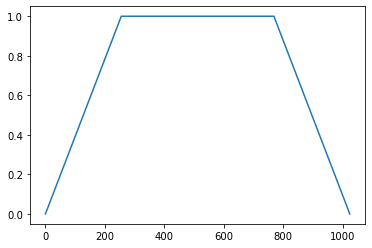

In [10]:
win = window_easing(1024, 256)
plt.plot(win)